In [2]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [3]:
USE_CUDA=torch.cuda.is_available()
device=torch.device("cuda" if USE_CUDA else "cpu")
print("다음 기기로 학습함", device)

다음 기기로 학습함 cpu


In [4]:
random.seed(777)
torch.manual_seed(777)

if device == 'cuda':
    torch.cuda.manual_seed_all(777)
    

In [5]:
training_epochs=15
batch_size=100


In [22]:
mnist_train=dsets.MNIST(root="MNIST_data/", train=True, transform=transforms.ToTensor(),
                        download=True)
mnist_test=dsets.MNIST(root="MNIST_data/", train=False, transform=transforms.ToTensor(),
                        download=True)

In [23]:
data_loader=DataLoader(dataset=mnist_train, #훈련데이터
                       batch_size=batch_size, # 배치의 크기
                       shuffle=True, # 매 에포크마다 미니배치를 서플할 것인가?
                       drop_last=True #마지막 배치를 버릴 것인가?
                       )


- 데이터 수 : 1000개
- 배치 크기 : 128
- 1000/128 = 7개의 iterator, 나머지 104일때,
    - 배치 크기 128을 충족하지 못하는 배치를 drop_last=True 일 때 버림
    - iterator 마다 가중치 (W), 편향(b) 업데이트

In [28]:
for X, Y in data_loader:
    x=X.view(-1,28 * 28).to(device)
    print(x)
    # y=Y.to(device)
    # print(y)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ...

In [24]:
# MNIST_data size(28 * 28 = 784)
linear=nn.Linear(784,10,bias=True).to(device)

In [25]:
crit=nn.CrossEntropyLoss().to(device)
optimizer=torch.optim.SGD(linear.parameters(),lr=0.1)

In [26]:
for epoch in range(training_epochs):
    avg_cost=0
    total_batch=len(data_loader)
    
    for X, Y in data_loader:
        # 배치크기가 100, X(100,784)
        X=X.view(-1,28 * 28).to(device)
        Y=Y.to(device)

        optimizer.zero_grad()
        y_hat=linear(X)

        cost=crit(y_hat,Y)

        cost.backward()
        optimizer.step()

        avg_cost+=cost/total_batch

    print('Epoch=%d, cost=%.9f' %(epoch,avg_cost))
print('End')

Epoch=0, cost=0.535696387
Epoch=1, cost=0.359308392
Epoch=2, cost=0.331124574
Epoch=3, cost=0.316375643
Epoch=4, cost=0.307090342
Epoch=5, cost=0.300270140
Epoch=6, cost=0.295029253
Epoch=7, cost=0.290987968
Epoch=8, cost=0.287376940
Epoch=9, cost=0.284346193
Epoch=10, cost=0.282012820
Epoch=11, cost=0.279727280
Epoch=12, cost=0.277735054
Epoch=13, cost=0.276046008
Epoch=14, cost=0.274302930
End


In [29]:
X_test = mnist_test.test_data.view(-1,28*28).float().to(device)
Y_test = mnist_test.test_labels.to(device)

prediction = linear(X_test)
correct_prediction = torch.argmax(prediction,1) == Y_test
accuracy = correct_prediction.float().mean()
print('Accuracy:', accuracy.item())

Accuracy: 0.891700029373169


c:\Users\admin\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
c:\Users\admin\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


4734
Lable tensor([2])
prediction:  2


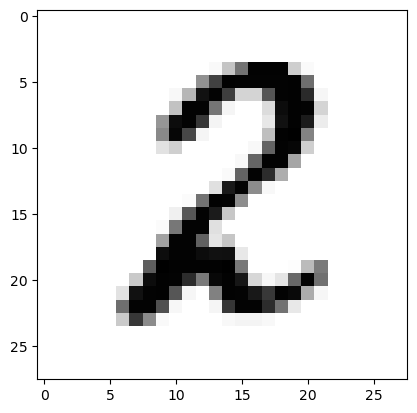

In [43]:
r=random.randint(0,len(mnist_test)-1)
print(r)
X_single_data=mnist_test.test_data[r:r+1].view(-1,28*28).float().to(device)
Y_single_data=mnist_test.test_labels[r:r+1].to(device)

print("Lable",Y_single_data)
single_prediction=linear(X_single_data)
print("prediction: ",torch.argmax(single_prediction,1).item())
plt.imshow(mnist_test.test_data[r:r+1].view(28,28),cmap='Greys', interpolation='nearest')
plt.show()